### "WARNING": This document is aimed for instruction ONLY. Random modules were NOT used in real-implementations.

# Import Module

In [1]:
import random
import data, processing, plot, metric
import matplotlib.pyplot as plt
import numpy as np

root = "E:/Deep_Learning/Respiration/"

data_root = f"{root}DATA/"

# 1. data.py

## 1.1) patient_path

In [2]:
treatment_types = ["STATIC", "ARC"]   # ARC -> Breathhold_type ONLY
breath_types = ["Breathhold", "FULL"]

treatment = treatment_types[1]
breath = breath_types[0]

patient_path, num_fractions = data.patient_path(data_root, treatment, breath)

patient_ID = patient_path.split("/")[5].split("_")[0]
print(f"Patient ID: {patient_ID}")
print(f"Treatment: {treatment}")
print(f"Breath: {breath}")
print()
print(f"There are {num_fractions} fractions.")

Patient ID: 28796
Treatment: ARC
Breath: Breathhold

There are 30 fractions.


## 1.2) fraction_path

In [3]:
fractions = range(num_fractions)
fraction_path, num_fields = data.fraction_path(patient_path, random.choice(fractions))
print(f"There are {num_fields} fields.")

There are 2 fields.


## 1.3) read_field_data

In [4]:
fields = range(num_fields)
(data_Times, data_Amps), (beam_Times, beam_Amps) = data.read_field_data(fraction_path, random.choice(fields))

print("Time(s)\tData(cm)")
print(f"{data_Times[0]}\t{data_Amps[0]}")
print(f"{data_Times[1]}\t{data_Amps[1]}")
print(f"{data_Times[2]}\t{data_Amps[2]}")
print("...\t...")
print("...\t...")
print(f"{data_Times[-3]}\t{data_Amps[-3]}")
print(f"{data_Times[-2]}\t{data_Amps[-2]}")
print(f"{data_Times[-1]}\t{data_Amps[-1]}")
print()
print("Time(s)\tBeam(cm)")
print(f"{beam_Times[0]}\t{beam_Amps[0]}")
print(f"{beam_Times[1]}\t{beam_Amps[1]}")

Time(s)	Data(cm)
0.0	1.8540413814
0.015	1.85478044693933
0.03	1.85551951247866
...	...
...	...
118.2	1.85893840674505
118.215	1.85249375524206
118.23	1.84604910373908

Time(s)	Beam(cm)
0.0659958723606922	1
16.4659701539927	0


# 2. processing.py

## 2.1) cut_by_beams

(<Axes: title={'center': 'Beam-cutted data'}>,
 Text(0.5, 1.0, 'Beam-cutted data'))

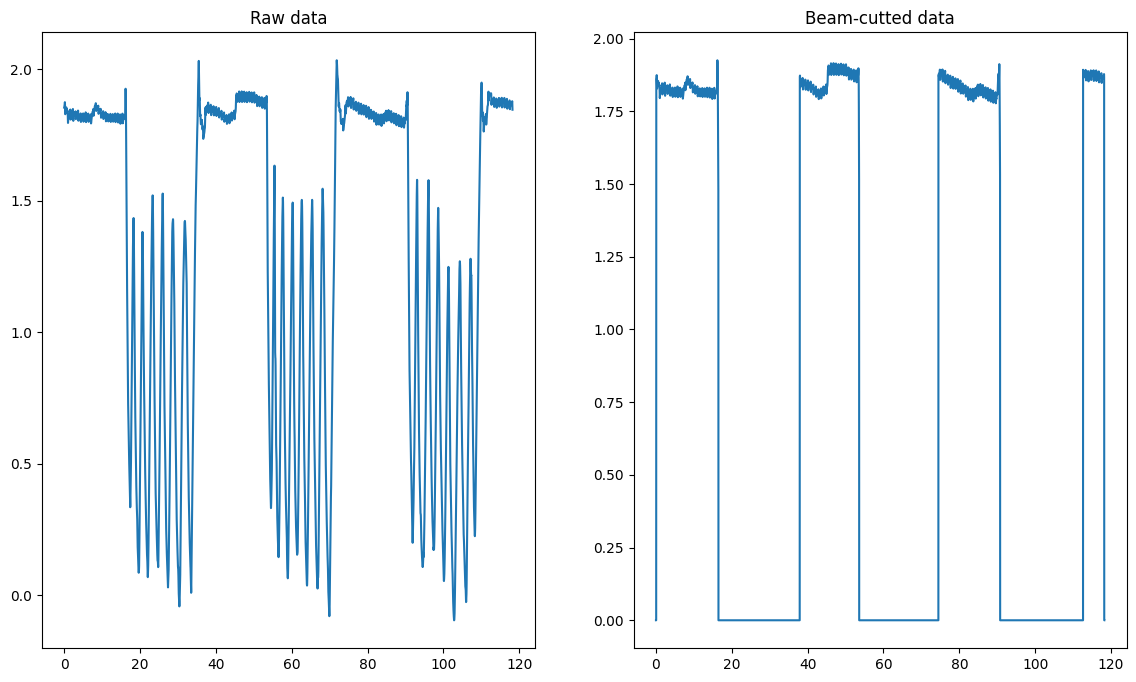

In [5]:
cutted_Amps = processing.cut_by_beams(data_Times, data_Amps, beam_Times)

plt.figure(figsize=(14,8))
plt.subplot(121), plt.plot(data_Times, data_Amps), plt.title("Raw data")
plt.subplot(122), plt.plot(data_Times, cutted_Amps), plt.title("Beam-cutted data")

## 2.2) beam_enabling_intervals

In [6]:
enabled_intervals, num_intervals = processing.beam_enabling_intervals(data_Times, data_Amps, beam_Times)

print(f"There are {num_intervals} beam-sessions.")

There are 4 beam-sessions.


## 2.3) regression_line

([<matplotlib.lines.Line2D at 0x15fb1e31590>],
 [<matplotlib.lines.Line2D at 0x15fb1ef2350>])

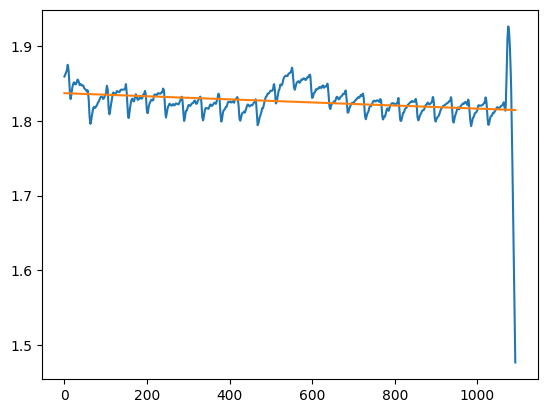

In [7]:
intervals = range(num_intervals)
sampled_interval = enabled_intervals[random.choice(intervals)]
fitted_line = processing.regression_line(sampled_interval)

plt.plot(range(len(sampled_interval)), sampled_interval), plt.plot(range(len(sampled_interval)), fitted_line)

# 3. metric.py

## 3.1) Average Levels

In [8]:
average_level = metric.avg_lvl_per_interval(sampled_interval)

print(f"Average level for current beam-session: {average_level}")

""" metric.reprod_per_field(field_levels) -> [Max_level] - [min_level] """
"""Field Levels -> List of average levels in ONE field of data"""

""" metric.mean_reprod_per_fraction(reproducibilities) -> mean(reproducibilities) """
"""Reproducibilities -> List of reproducibilities in ONE fraction of data"""
print()

Average level for current beam-session: 1.8255075708016106



## 3.2) Vertical Errors

In [9]:
vertical_error = metric.error_per_interval(sampled_interval)

print(f"Vertical error for current beam-session: {vertical_error}")

""" metric.stab_per_field(field_levels) -> Max(vertical_errors) """
"""Vertical Errors -> List of vertical errors in ONE field of data"""

""" metric.mean_stab_per_fraction(stabilities) -> mean(stabilities) """
"""Stabilities -> List of stabilities in ONE fraction of data"""
print()

Vertical error for current beam-session: 0.0225056364251424



# Bulk Processing

([<matplotlib.lines.Line2D at 0x15fb88def90>],
 [<matplotlib.lines.Line2D at 0x15fb88dec90>])

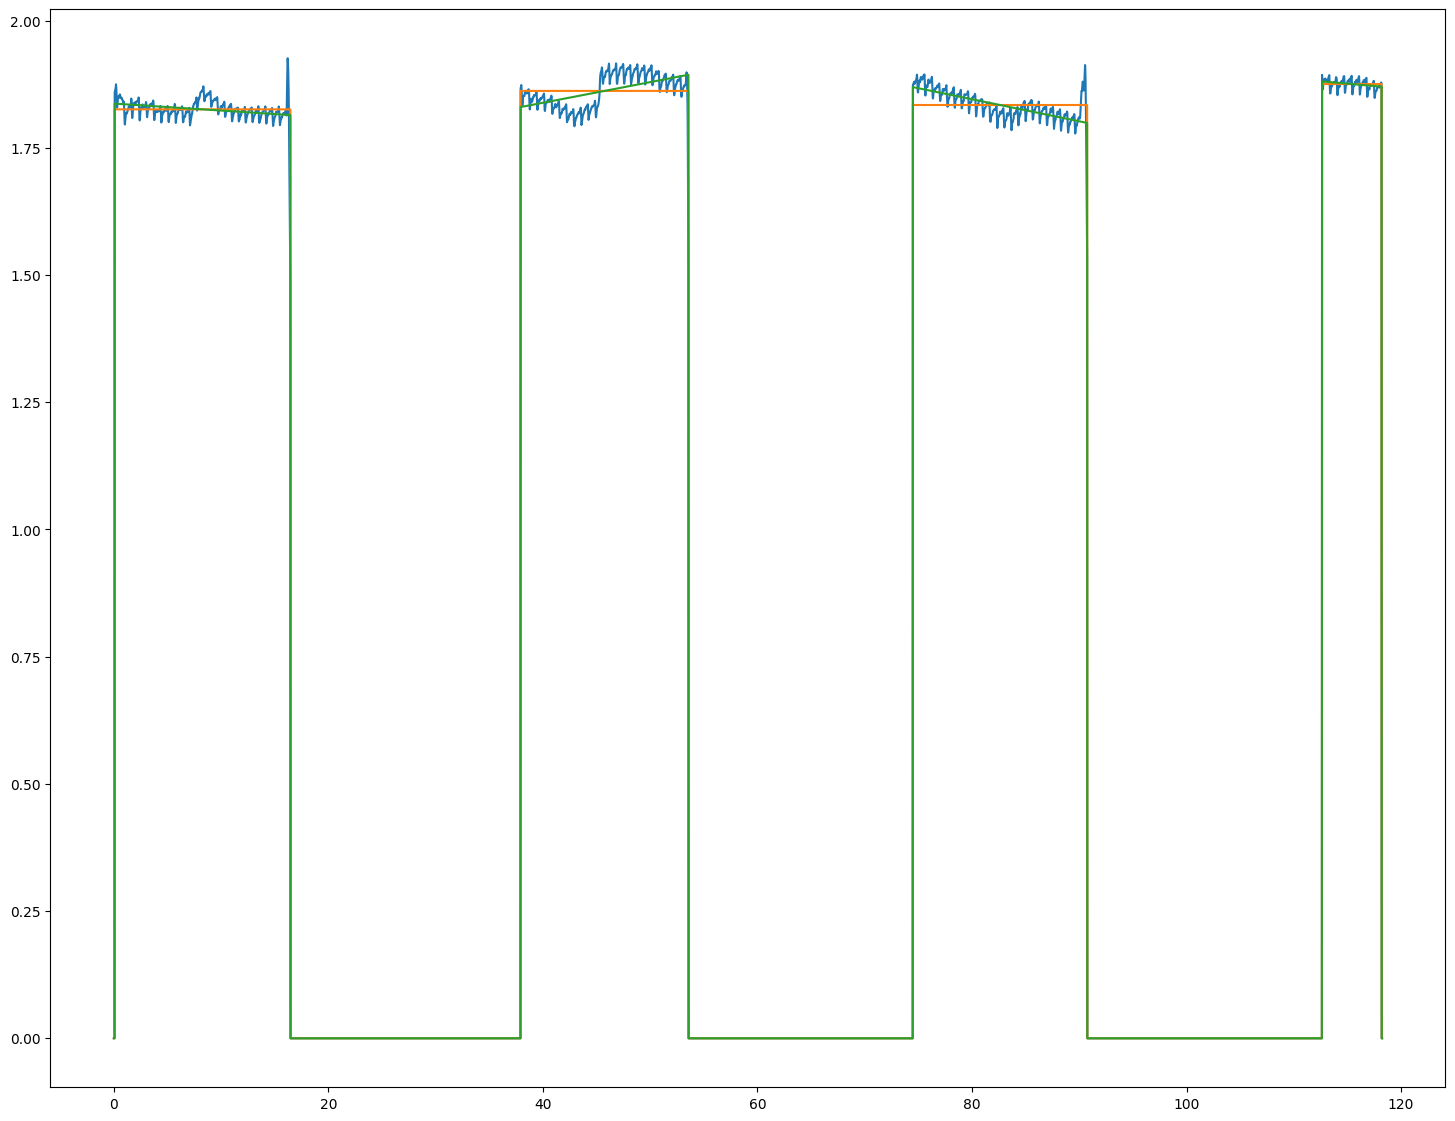

In [18]:
for fraction in range(1, num_fractions+1):  # for ALL fractions
    fr_path, num_fields = data.fraction_path(patient_path, fraction)

    for field in range(1, num_fields+1):    # for ALL fields
        (data_Times, data_Amps), (beam_Times, beam_Amps) = data.read_field_data(fraction_path, field)
        cutted_Amps = processing.cut_by_beams(data_Times, data_Amps, beam_Times)
        enabled_intervals, num_intervals = processing.beam_enabling_intervals(data_Times, data_Amps, beam_Times)
        field_levels, field_lines, field_errors = [], [], []

        for interval in range(num_intervals):
            average_level = metric.avg_lvl_per_interval(enabled_intervals[interval])
            fitted_line = processing.regression_line(enabled_intervals[interval])
            vertical_error = metric.error_per_interval(enabled_intervals[interval])
            field_levels.append(average_level)
            field_lines.append(fitted_line)
            field_errors.append(vertical_error)

        dilated_avgs, dilated_lines = processing.dilate_metrics(data_Times, beam_Times, field_levels, field_lines)

plt.figure(figsize=(18, 14))
plt.plot(data_Times, cutted_Amps), plt.plot(data_Times, dilated_avgs), plt.plot(data_Times, dilated_lines)